In [72]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import scipy.stats
import numpy as np
import mpl_logoplot

In [73]:
sns.set_context('notebook',font_scale=2.0)#,rc={'savefig.bbox':'tight'})
mpl.rcParams['savefig.bbox'] = 'tight'

### Load in the data

In [139]:
with open('../TransferModel/bepipred3.json') as fi:
    data = json.load(fi)

### Print the length of data and the keys for the first datapoint

In [140]:
print(len(data))
print(data[0].keys())

190
dict_keys(['interface', 'method', 'q3_prob', 'epitope', 'seq', 'disorder', 'phi', 'desc', 'rsa', 'q8_prob', 'q3', 'psi', 'preds', 'id', 'q8', 'asa'])


### Print the keys and length of values for the first datapoint.

In [141]:
for key,val in data[0].items():
    print(key)
    print(len(val),type(val))

interface
344 <class 'list'>
method
7 <class 'str'>
q3_prob
344 <class 'list'>
epitope
344 <class 'list'>
seq
344 <class 'str'>
disorder
344 <class 'list'>
phi
344 <class 'list'>
desc
11 <class 'str'>
rsa
344 <class 'list'>
q8_prob
344 <class 'list'>
q3
344 <class 'str'>
psi
344 <class 'list'>
preds
344 <class 'list'>
id
12 <class 'str'>
q8
344 <class 'str'>
asa
344 <class 'list'>


### A function that extracts selected features from a JSON entry and places them in a pandas dataframe. Entries/dataframes merged into a master DF

In [132]:
#features = ['asa','disorder','epitope','interface','phi','psi','preds','rsa','q3_prob','seq']
def extractFeatures(data):
    features = ['epitope','preds','seq','desc']
    feats = list(map(lambda feat:data[feat], features))
    feats = dict(zip(features,feats))
    feats['seq'] = list(feats['seq'])
    feats['desc'] = [feats['desc']]*len(feats['preds'])
    try:
        return pd.DataFrame(feats,columns=features)
    except ValueError:
        return []

#dfList = list(filter(lambda x:len(x)>0,dfList))#Examples of when epitope feature does not match in length???
df_master = pd.concat(dfList)
print(df_master)
    

    epitope     preds seq         desc
0         0  0.030186   S  4LVN_CB A 3
1         0  0.049305   R  4LVN_CB A 3
2         0  0.056633   P  4LVN_CB A 3
3         0  0.066937   G  4LVN_CB A 3
4         0  0.152409   K  4LVN_CB A 3
5         0  0.132132   Y  4LVN_CB A 3
6         0  0.152006   H  4LVN_CB A 3
7         0  0.113419   F  4LVN_CB A 3
8         0  0.154553   N  4LVN_CB A 3
9         0  0.130225   D  4LVN_CB A 3
10        0  0.155909   E  4LVN_CB A 3
11        0  0.113757   F  4LVN_CB A 3
12        0  0.165456   R  4LVN_CB A 3
13        0  0.130227   N  4LVN_CB A 3
14        0  0.056190   L  4LVN_CB A 3
15        0  0.061328   Q  4LVN_CB A 3
16        0  0.064019   W  4LVN_CB A 3
17        0  0.045526   G  4LVN_CB A 3
18        0  0.056661   L  4LVN_CB A 3
19        0  0.087404   D  4LVN_CB A 3
20        0  0.062965   L  4LVN_CB A 3
21        0  0.049063   S  4LVN_CB A 3
22        0  0.066037   R  4LVN_CB A 3
23        0  0.053107   L  4LVN_CB A 3
24        0  0.115169   D

### Density plots for prediction scores, colored by the amino acid type. There is clearly a difference in means of the distributions!

In [78]:
sns.set_palette(sns.color_palette("hls", 20))

Epitope Status: 0.0


/Users/s112800/Envs/epitope/lib/python3.5/site-packages/scipy/stats/stats.py:1625: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


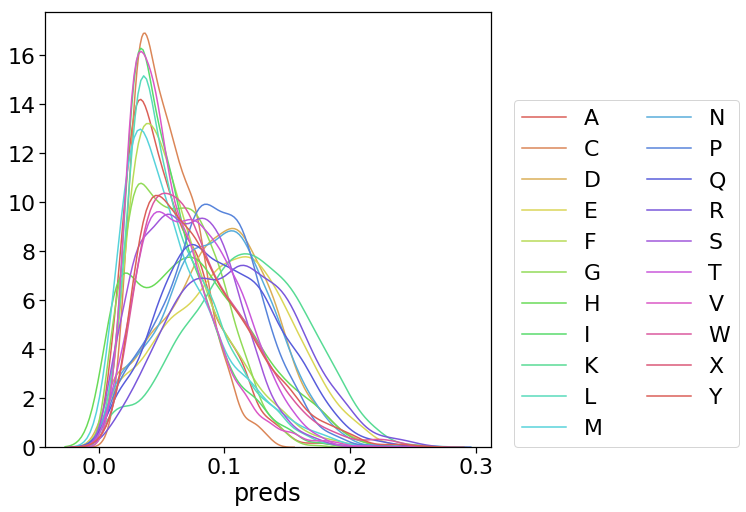

Epitope Status: 1.0


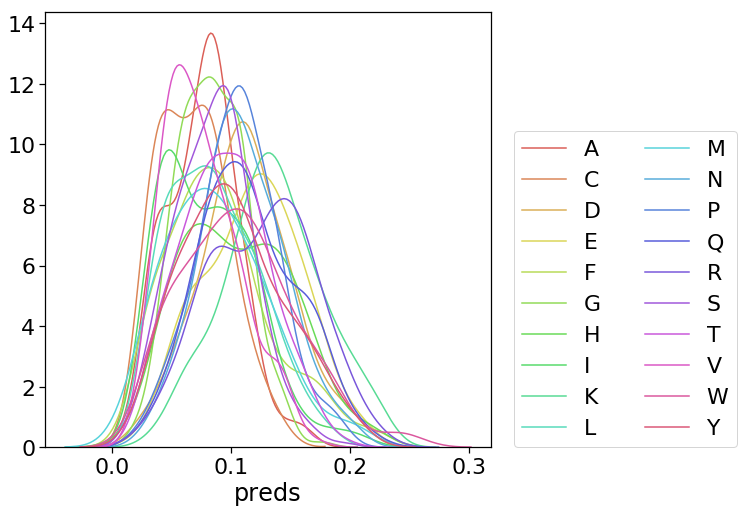

In [79]:
def plotAApredDistrib(df,groupCol='seq'):
    plt.figure(figsize=(8,8))
    for group in df.groupby(groupCol):
        sns.distplot(group[1].preds,hist=False,label=group[0])
    plt.legend(loc=[1.05,0],ncol=2)    
    plt.show()
    
for group in df_master.groupby('epitope'):
    print("Epitope Status: %.1f"%group[0])
    plotAApredDistrib(group[1])

### Comparing prediction score distributions for epitopes and background of amino acids.
There is also a difference in the overlap of the positive and negative distributions for amino acids. Indicating that the method is better at decerning between epitopes and background for some amino acids.

Amino acid: A


/Users/s112800/Envs/epitope/lib/python3.5/site-packages/scipy/stats/stats.py:1625: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


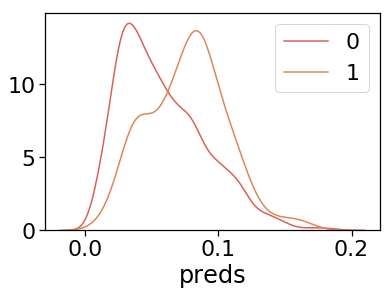

Amino acid: C


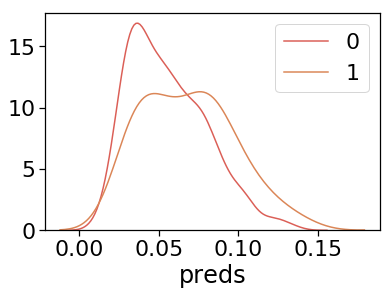

Amino acid: D


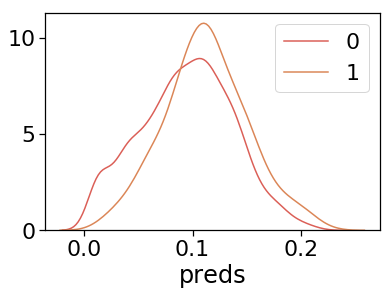

Amino acid: E


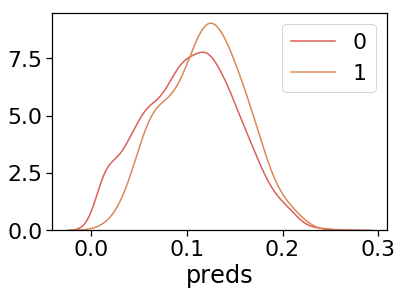

Amino acid: F


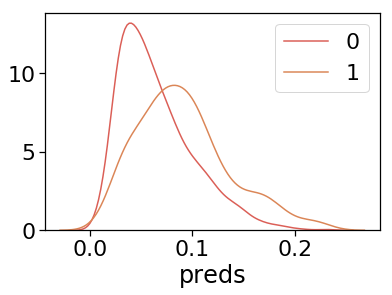

Amino acid: G


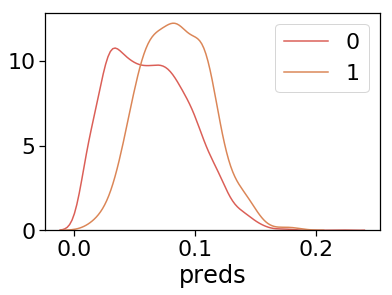

Amino acid: H


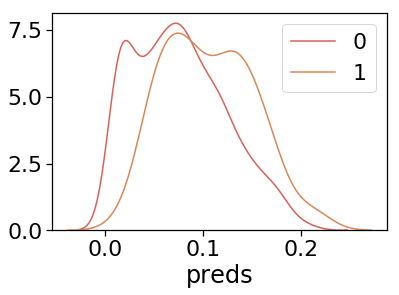

Amino acid: I


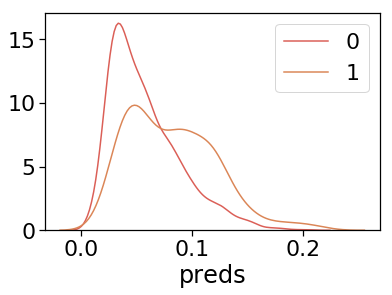

Amino acid: K


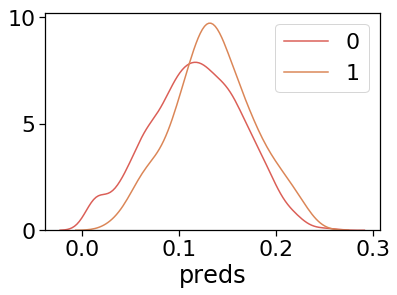

Amino acid: L


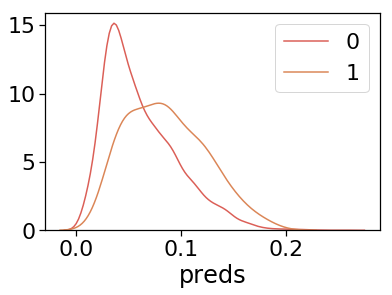

Amino acid: M


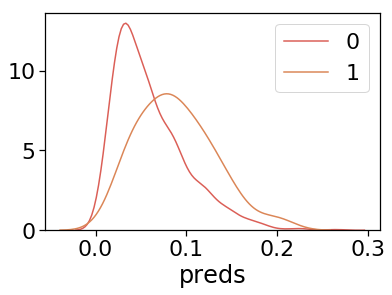

Amino acid: N


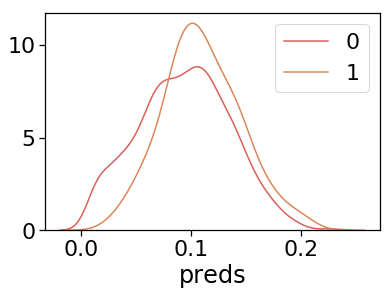

Amino acid: P


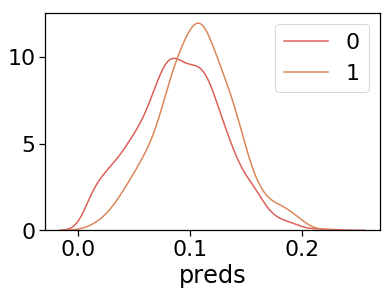

Amino acid: Q


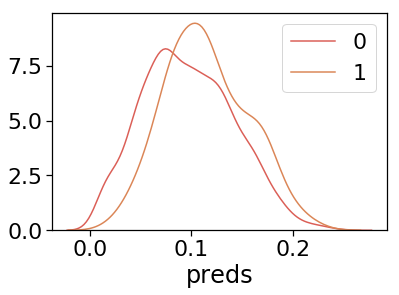

Amino acid: R


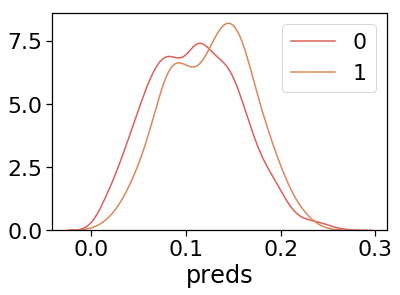

Amino acid: S


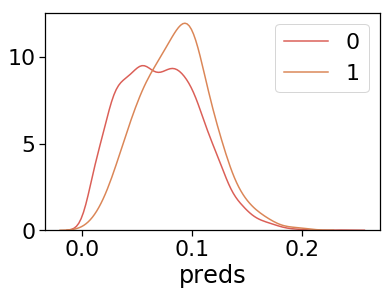

Amino acid: T


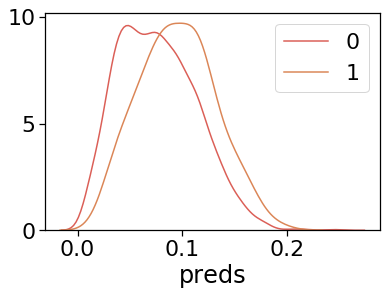

Amino acid: V


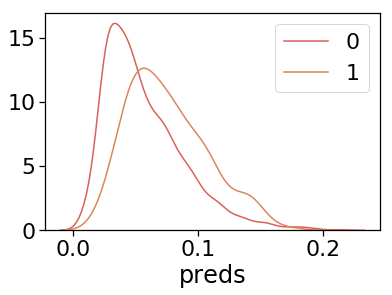

Amino acid: W


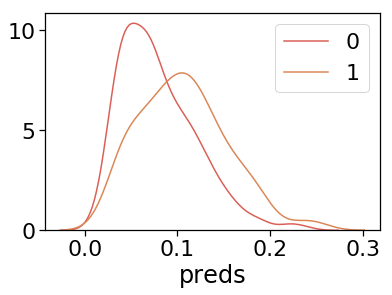

Amino acid: X


/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/s112800/Envs/epitope/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


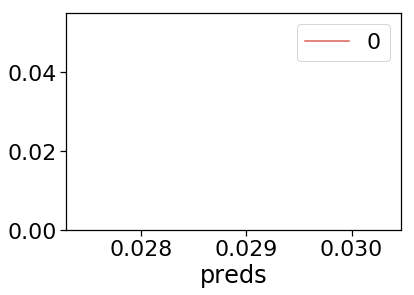

Amino acid: Y


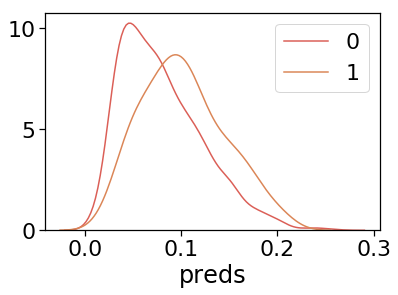

In [80]:
def comparePosNegDistrib(df,seqCol='seq',epiCol='epitope'):
    for group in df.groupby(seqCol):
        print("Amino acid: %s"%group[0])
        for group1 in group[1].groupby(epiCol):
            sns.distplot(group1[1].preds,hist=False,label=group1[0])
        plt.show()
comparePosNegDistrib(df_master)

### Comparing mean prediction score for epitopes and background for amino acids
Every point of the scatter plot falls above the identity line, indicating that for every amino acid, the mean prediction score for epitopes is higher than for non epitopes.

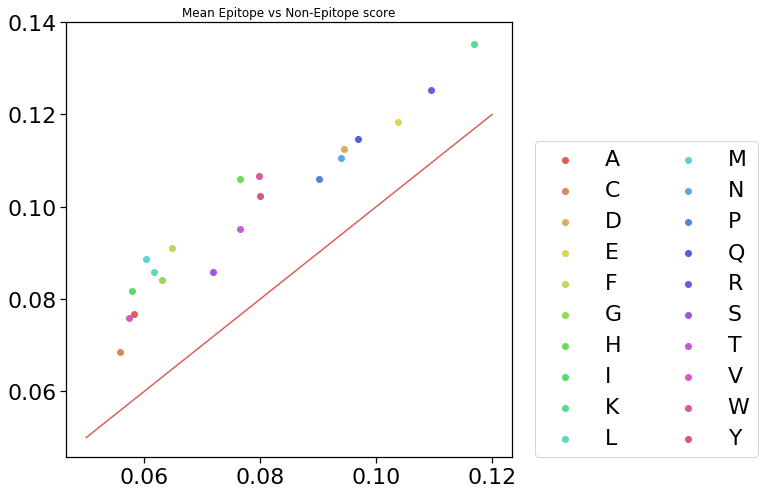

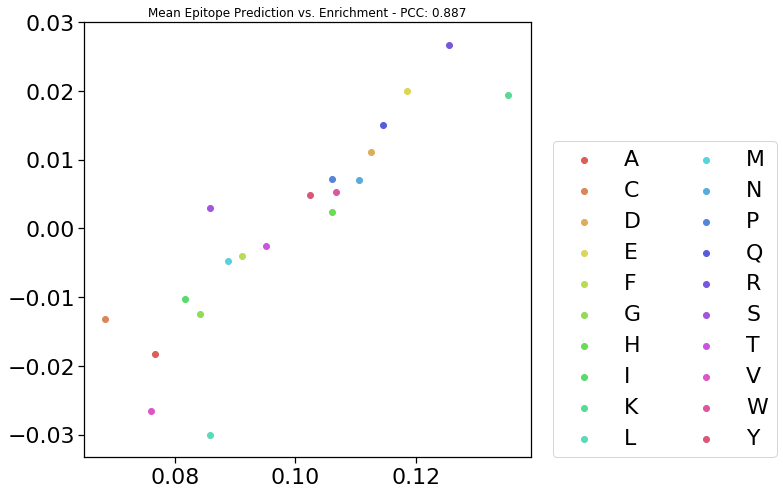

preds           AA   EpiFreq EpiDistribution NonDistribution  \
epitope         0         1                                                
seq                                                                        
A        0.058299  0.076745  A  0.059444        0.047778        0.066102   
C        0.055773  0.068440  C  0.040137        0.012073        0.025246   
D        0.094422  0.112549  D  0.096085        0.062420        0.051345   
E        0.103859  0.118446  E  0.105100        0.078346        0.058331   
F        0.064827  0.091062  F  0.073408        0.038788        0.042810   
G        0.063096  0.084105  G  0.067958        0.062163        0.074547   
H        0.076496  0.106004  H  0.087480        0.027999        0.025538   
I        0.057892  0.081749  I  0.066692        0.045980        0.056264   
K        0.116957  0.135286  K  0.106383        0.073208        0.053771   
L        0.061617  0.085895  L  0.055296        0.060878        0.090944   
M        0.060358  0.088731  M  0.061606        0.014385        0.019159   
N        0.094006  0.110614  N  0.091139        0.055484        0.048381   
P        0.090214  0.105982  P  0.091097        0.056512        0.049301   
Q        0.096812  0.114600  Q  0.108234        0.053686        0.038678   
R        0.109551  0.125395  R  0.121657        0.072438        0.045730   
S        0.071923  0.085768  S  0.083453        0.074493        0.071538   
T        0.076457  0.095151  T  0.077139        0.056512        0.059117   
V        0.057359  0.075996  V  0.051392        0.043154        0.069651   
W        0.079768  0.106649  W  0.102064        0.022862        0.017587   
Y        0.080040  0.102371  Y  0.090392        0.040843        0.035937   

        Enrichment  
epitope             
seq                 
A        -0.018324  
C        -0.013173  
D         0.011074  
E         0.020015  
F        -0.004023  
G        -0.012385  
H         0.002461  
I        -0.010284  
K         0.019437  
L        -0.030065  
M        -0.004774  
N         0.007104  
P         0.007210  
Q         0.015009  
R         0.026708  
S         0.002955  
T        -0.002605  
V        -0.026497  
W         0.005275  
Y         0.004905

In [81]:
df_meanPred = df_master.groupby(['epitope','seq'])['preds'].mean()

#Epitope frequencies
df_freq_all = df_master.groupby(['seq'])["seq"].value_counts()

total       = len(df_master['seq'].sum())
df_freq     = df_master.groupby(['epitope','seq'])["seq"].value_counts()
total_epi   = df_freq[1].sum()
total_non   = total-total_epi

#df_epi (chance of AA being an epitope) df_intra_epi (AA distribution in the epitopes)
df_epi       = df_freq[1]/df_freq_all
df_epi       = df_epi.dropna()
df_intra_epi = df_freq[1]/total_epi
df_intra_epi = df_intra_epi.dropna()
df_intra_non = df_freq[0]/total_non
df_intra_non = df_intra_non.dropna()
df_intra_non = df_intra_non.drop('X')

df_meanPred = df_meanPred.reset_index()
df_meanPred = df_meanPred.pivot(columns='epitope',index='seq')
df_meanPred = df_meanPred.dropna()
df_meanPred['AA'] = df_meanPred.index

val = df_meanPred.values

df_meanPred['EpiFreq'] = df_epi.values
df_meanPred['EpiDistribution'] = df_intra_epi.values
df_meanPred['NonDistribution'] = df_intra_non.values
df_meanPred['Enrichment']      = [ x-y for x,y  in zip(df_intra_epi.values, df_intra_non.values) ]


plt.figure(figsize=(8,8))
for i,j,k in val:
    plt.scatter(i,j,label=k)
plt.legend(loc=[1.05,0],ncol=2)

plt.plot([0.05,0.12],[0.05,0.12])#Plot identity line for comparison
plt.title('Mean Epitope vs Non-Epitope score',size=12)
plt.show()


val = df_meanPred.values
plt.figure(figsize=(8,8))
for ele in val:
    plt.scatter(ele[1],ele[6],label=ele[2])
plt.legend(loc=[1.05,0],ncol=2)
plt.title('Mean Epitope Prediction vs. Enrichment - PCC: {:.3f}'.format(scipy.stats.pearsonr([x[1] for x in val], df_meanPred['Enrichment'])[0]), size=12)
plt.show()

df_meanPred

### Logistic regression analysis
Incomplete...

In [ ]:
def splitPartitions(df,descCol='desc',testSet=1):
    cols = df.columns
    df['part'] = list(map(lambda x:int(x.split(' ')[-1]),df[descCol].values))
    df_test = df[df['part']==testSet]
    df_train = df[df['part']!=testSet]
    return df_test[cols], df_train[cols]

df_test, df_train = splitPartitions(df_master)

In [ ]:
from sklearn.linear_model import LogisticRegression

def getData(df,xCol='preds',yCol='epitope'):
    x = df[xCol].values
    x = x.reshape(-1,1)
    y = df[yCol]
    return x,y

x_test,y_test = getData(df_test)
x_train,y_train = getData(df_train)

clf = LogisticRegression(random_state=0, solver='lbfgs',).fit(x, y)
clf.score(x, y)
pred = clf.predict(x_test)


In [ ]:
for i,j in zip(y_test,pred):
    print(i,j)

### Performance evaluation of the model
AUC10 = Area under the first 10% of the curve. Used due to the unbalance in negative (non-epitopes) and positive (epitopes) data.

In [137]:
import utils

#Setup zscores
def calc_zscores(data):
    AA_zscore = dict()
    for group in data.groupby('seq'):
        mean = group[1].preds.mean()
        stdev = group[1].preds.std()
        if np.isnan(mean):
            mean = 0.001
        if np.isnan(stdev):
            stdev = 0.001
        AA_zscore[group[0]] = [mean, stdev]
    return AA_zscore


AA_zscore = calc_zscores(df_master)

def zscore(val, mean_std):
    return (val-mean_std[0])/mean_std[1]


def model_performance(data, zscores=None, pred_weight=None):
    """Calculates performances of a model"""
    performances = {'AUC': list(), 'AUC10': list(), 'HITS': list()}
    #Combine pdbs with multiple chains
    pdbs = dict()
    combined = {'preds': list(), 'targets': list()}
    for chain in data:
        pdbid, chainid, partition = chain['desc'].split(' ')
        
        if pdbid not in pdbs:
            pdbs[pdbid] = {'predictions': list(),'targets': list(),'aminoacid':list() }
            
        if not zscores:
            preds = chain['preds']
        else: 
            if pred_weight:
                #Amino acid Zscore used as weight on the prediction scores
                preds = [ zscore(x, zscores[chain['seq'][i]])*x for i, x in enumerate(chain['preds'])]                 
            else:
                #Predict using only Amino acid specific Zscores
                preds = [ zscore(x, zscores[chain['seq'][i]]) for i, x in enumerate(chain['preds'])] 

        combined['preds'].extend(preds)
        pdbs[pdbid]['predictions'].extend(preds)
        pdbs[pdbid]['targets'].extend(chain['epitope'])
        pdbs[pdbid]['aminoacid'].extend(list(chain['seq'])) 

        combined['targets'].extend(chain['epitope'])

    sums = {'pred':list(), 'target':list()}
    epitope_dist = { x: 0. for x in mpl_logoplot.COLORS['protein'].keys() }
    predict_dist = { x: 0. for x in mpl_logoplot.COLORS['protein'].keys() }
    hits_dist    = { x: 0. for x in mpl_logoplot.COLORS['protein'].keys() }
    for pdb in pdbs:
        sums['pred'].append(sum(pdbs[pdb]['predictions']))
        sums['target'].append(sum(pdbs[pdb]['targets']))
        epitope = ''.join(sorted([ a for t, a in zip(pdbs[pdb]['targets'], pdbs[pdb]['aminoacid']) if t == 1]))
        pdbs[pdb]['predictions'], pdbs[pdb]['targets'], pdbs[pdb]['aminoacid'] = zip(*sorted(zip(pdbs[pdb]['predictions'], pdbs[pdb]['targets'], pdbs[pdb]['aminoacid']), reverse=True))
        preds, target, amino = zip(*sorted(zip(pdbs[pdb]['predictions'], pdbs[pdb]['targets'], pdbs[pdb]['aminoacid']), reverse=True))
        #print(pdb, ''.join([ x if pdbs[pdb]['targets'][i] == 1 else x.lower() for i,x in enumerate(pdbs[pdb]['aminoacid'][:len(epitope)])]), epitope)

        for i, aa in enumerate(amino[:len(epitope)]):
            if aa == 'X': continue
            predict_dist[aa] += 1
            if target[i] == 1:
                hits_dist[aa] +=1
        
        for aa in epitope:
            if aa == 'X': continue
            epitope_dist[aa] += 1
        
        performances['HITS'].append(float(sum([ 1 if pdbs[pdb]['targets'][i] == 1 else 0 for i,x in enumerate(pdbs[pdb]['aminoacid'][:20])]))/20)
        
        auc, auc10 = utils.calc_auc(pdbs[pdb]['predictions'], pdbs[pdb]['targets'], ten=True)
        performances['AUC'].append(auc)
        performances['AUC10'].append(auc10)
    
    if not zscores:
        print('Summed predictions vs summed targets:')
        print('Mean :', np.mean(np.array(sums['pred'])), np.mean(np.array(sums['target'])))
        print('STDEV:',np.std(np.array(sums['pred'])), np.std(np.array(sums['target'])))
        print('PCC  :', scipy.stats.pearsonr(sums['pred'], sums['target'])[0])
    for measurement in sorted(performances):
        print('{}:\t{:.5f}\t{:.5f}\t{:.5f} '.format(measurement, np.mean(np.array(performances[measurement])), np.median(np.array(performances[measurement])), np.std(np.array(performances[measurement]))) )
    
    c_auc, c_auc10 = utils.calc_auc(combined['preds'], combined['targets'], ten=True)
    print('Pooled:')
    print('AUC:\t{:.5f}'.format(c_auc))
    print('AUC10:\t{:.5f}'.format(c_auc10))
    print('Epitope Dist vs. Pred Dist')
    print('PCC:\t{:.5f}'.format(scipy.stats.pearsonr([ epitope_dist[x] for x in sorted(epitope_dist) ], [ predict_dist[x] for x in sorted(predict_dist) ])[0] ))
    print('Epitope Dist vs. Hits Dist')
    print('PCC:\t{:.5f}'.format(scipy.stats.pearsonr([ epitope_dist[x] for x in sorted(epitope_dist) ], [ hits_dist[x] for x in sorted(hits_dist) ])[0] ))
    
    return epitope_dist, predict_dist, hits_dist, performances['AUC10'] 
        
def individual_aminoacid(data, zscores):
    all_neg_preds   = list(list(data.groupby('epitope'))[0][1].preds )
    all_neg_targets = [0]*len(all_neg_preds)
    all_neg_preds_z = list(data.groupby('epitope'))[0][1]
    all_neg_preds_z = [ zscore(p, zscores[s])  for p,s in zip(all_neg_preds_z.preds, all_neg_preds_z.seq)]
    AA_performances = {'AUCs': list(),'AUC10s': list(),'AUCa': list(),'AUC10a': list(),'AUCaz': list(),'AUC10az': list() }
    for group in data.groupby('seq'):
        if group[0] == 'X': continue
        epitope_group = list(group[1].groupby('epitope'))
        aa_negatives = list(epitope_group[0][1].preds)
        aa_epitopes  = list(epitope_group[1][1].preds)

        auc_s, auc10_s = utils.calc_auc(aa_epitopes+aa_negatives, [1]*len(aa_epitopes)+[0]*len(aa_negatives), ten=True)
        AA_performances['AUCs'].append(auc_s)
        AA_performances['AUC10s'].append(auc10_s)    

        auc_a, auc10_a = utils.calc_auc(aa_epitopes+all_neg_preds, [1]*len(aa_epitopes)+all_neg_targets, ten=True)
        AA_performances['AUCa'].append(auc_a)
        AA_performances['AUC10a'].append(auc10_a)
        
        aa_epitopes_z = [ zscore(x,zscores[group[0]]) for x in aa_epitopes ]
        auc_az, auc10_az = utils.calc_auc(aa_epitopes_z+all_neg_preds_z, [1]*len(aa_epitopes)+all_neg_targets, ten=True)
        AA_performances['AUCaz'].append(auc_az)
        AA_performances['AUC10az'].append(auc10_az)
        print('{} AUCs: {:.3f}\tAUC10s: {:.3f} | AUCa: {:.3f}\tAUC10a: {:.3f} | AUCaz: {:.3f}\tAUC10az: {:.3f}'.format(group[0], auc_s,auc10_s, auc_a,auc10_a, auc_az,auc10_az))

    print('AVERAGE: AUCs: {:.3f}\tAUC10s: {:.3f} | AUCa: {:.3f}\tAUC10a: {:.3f} | AUCaz: {:.3f}\tAUC10az: {:.3f}'.format(np.mean(np.array(AA_performances['AUCs'])), np.mean(np.array(AA_performances['AUC10s'])),np.mean(np.array(AA_performances['AUCa'])), np.mean(np.array(AA_performances['AUC10a'])), np.mean(np.array(AA_performances['AUCaz'])), np.mean(np.array(AA_performances['AUC10az']))))

def logoplot_distribution(distribution, title='', outfile=None):
    logoplot = np.array([ distribution[aa]/sum(distribution.values()) for aa in sorted(distribution) ])
    logoplot  = np.diag(logoplot)
    #print(logoplot)
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)

    entropy = np.array([1.]*20)
    aminoacids = ''.join(sorted(mpl_logoplot.COLORS['protein'].keys()))
    mpl_logoplot.logoplot(ax, logoplot, aminoacids, height=entropy, color='protein')

    ax.set_xlabel('Amino Acids')
    ax.set_ylabel('Distribution')
    ax.set_title(title)

    fig.tight_layout()
    plt.show()
    if outfile:
        fig.savefig(outfile)
    

Original Model Performance:
Summed predictions vs summed targets:
Mean : 23.337993780378785 23.593939393939394
STDEV: 14.238796933356571 12.687334161183704
PCC  : 0.2990355581689912
AUC:	0.64354	0.65560	0.11723 
AUC10:	0.09997	0.07494	0.09105 
HITS:	0.16000	0.10000	0.14649 
Pooled:
AUC:	0.66331
AUC10:	0.10352
Epitope Dist vs. Pred Dist
PCC:	0.64271
Epitope Dist vs. Hits Dist
PCC:	0.62154

Zscore Model Performance:
AUC:	0.61973	0.62702	0.12216 
AUC10:	0.08987	0.06653	0.08883 
HITS:	0.15152	0.10000	0.14243 
Pooled:
AUC:	0.64422
AUC10:	0.09555
Epitope Dist vs. Pred Dist
PCC:	0.48352
Epitope Dist vs. Hits Dist
PCC:	0.48385

Zscore*Prediction Model Performance:
AUC:	0.60102	0.60784	0.12635 
AUC10:	0.09398	0.06650	0.09444 
HITS:	0.15606	0.10000	0.15184 
Pooled:
AUC:	0.62376
AUC10:	0.09895
Epitope Dist vs. Pred Dist
PCC:	0.93576
Epitope Dist vs. Hits Dist
PCC:	0.79249

Ttest_relResult(statistic=1.9909615448579585, pvalue=0.04814600768679518)
Individual Amino Acid Performance:
A AUCs: 0.678	AU

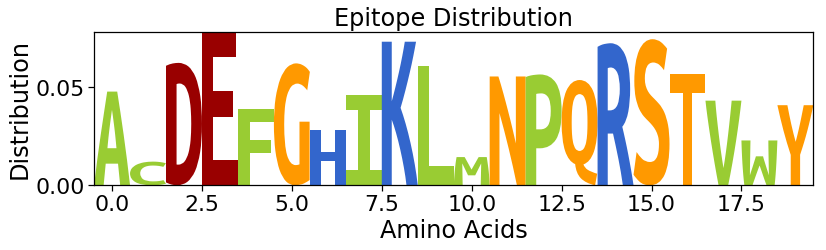

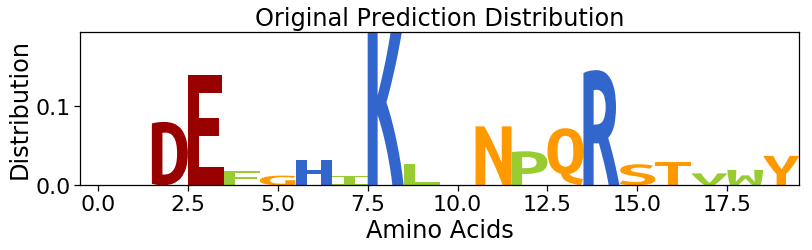

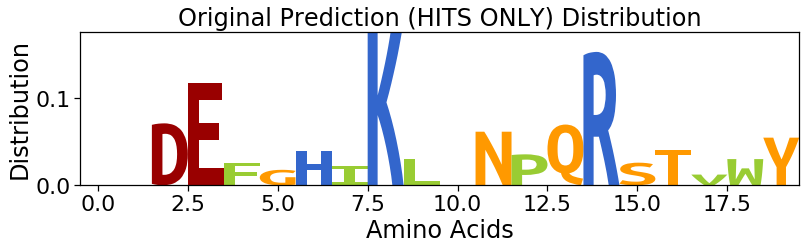

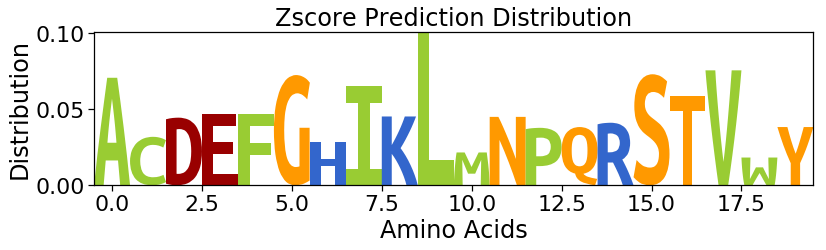

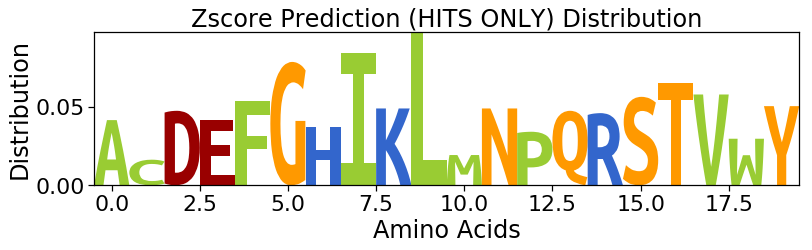

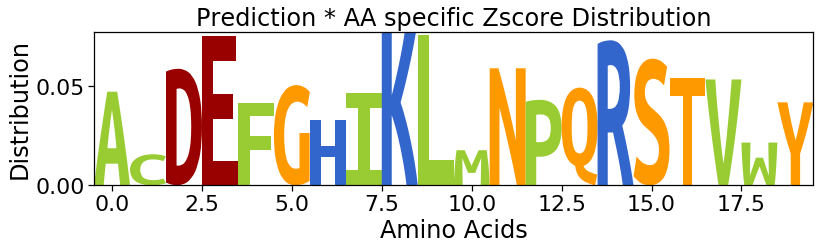

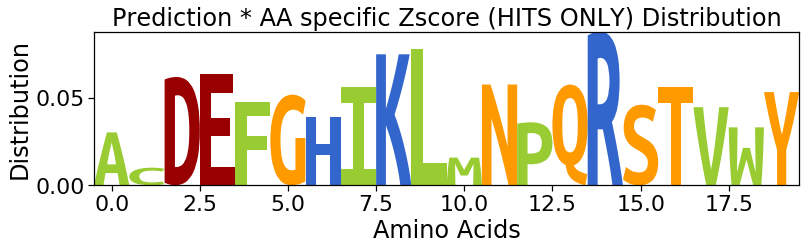

In [143]:
print('Original Model Performance:')
epitope_dist, orig_predict, orig_hits, orig_auc10 = model_performance(data)
print('')
print('Zscore Model Performance:')
epitope_dist, zscore_predict, zscore_hits, zscore_auc10 = model_performance(data, zscores=AA_zscore)
print('')
print('Zscore*Prediction Model Performance:')
epitope_dist, zscore_pred_weight, zscore_hits_weight, zscore_w_auc10 = model_performance(data, zscores=AA_zscore, pred_weight=True)
print('')

GNRL = [0.007421150278293135, 0.05387205387205387, 0.20893719806763286, 0.0, 0.05846153846153846, 0.40271493212669685, 0.10568654646324549, 0.24209770114942533, 0.04581072935503316, 0.07159114421684254, 0.0688259109311741, 0.11930405965202982, 0.0675950101537569, 0.0049066375902957655, 0.08100986059163551, 0.08531746031746032, 0.12662013958125623, 0.15881809787626963, 0.051612903225806465, 0.025242718446601965, 0.09902225920532556, 0.13406214039125433, 0.024044795783926216, 0.039176954732510295, 0.04166666666666669, 0.04291267942583732, 0.0, 0.06444636678200692, 0.02585034013605442, 0.14579552329098608, 0.004398527004909985, 0.004593175853018373, 0.07012750455373404, 0.2786596119929453, 0.05638111888111889, 0.1519607843137255, 0.014053579270970578, 0.18181818181818177, 0.11259676284306827, 0.06428571428571428, 0.04942133249921802, 0.13922944525354164, 0.1540229885057471, 0.09966216216216216, 0.07098214285714285, 0.12610441767068276, 0.2926829268292683, 0.03678678678678678, 0.11842105263157894, 0.31493506493506496, 0.14189514189514188, 0.04863056333644569, 0.029629629629629634, 0.2934782608695652, 0.08190883190883194, 0.13868003341687551, 0.12424129815434165, 0.0, 0.1204481792717087, 0.08207792207792207, 0.05996131528046422, 0.019848577859627584, 0.08599290780141845, 0.1648137251865845, 0.0861344537815126, 0.12845528455284552, 0.22320027555589572, 0.13210347752332485, 0.09521812080536915, 0.004545454545454547, 0.10126382306477094, 0.019097222222222224, 0.0, 0.17345328282828282, 0.4441176470588235, 0.28317901234567905, 0.055654338549075394, 0.0, 0.1414141414141414, 0.2699055330634278, 0.07783018867924528, 0.0595667870036101, 0.08128247197156138, 0.030565881866997102, 0.06837606837606838, 0.04745125675358234, 0.073198127925117, 0.039655996177735305, 0.016491754122938528, 0.22675304878048783, 0.06861209964412811, 0.0476190476190476, 0.045421042933480746, 0.0, 0.06561085972850679, 0.15126471324818433, 0.10185892538833716, 0.06414662084765178, 0.04504189944134079, 0.24275362318840576, 0.0, 0.0, 0.1965811965811966, 0.16116504854368932, 0.0675422138836773, 0.11910851297040559, 0.19841269841269843, 0.03587962962962963, 0.0, 0.014957264957264956, 0.022071307300509345, 0.07002457002457001, 0.09297052154195012, 0.12909226190476192, 0.17763157894736845, 0.0, 0.02439024390243903, 0.4067796610169492, 0.1219971738106453, 0.0, 0.042178542178542174, 0.058627581612258485, 0.05640394088669951, 0.1752336448598131, 0.1364692218350755, 0.12874942316566682, 0.12037470725995317, 0.1692307692307692, 0.12941176470588234, 0.0, 0.06877192982456141, 0.022713687985654516, 0.033604527767951906, 0.08895104895104897, 0.057130004498425556, 0.0, 0.07613694430250383, 0.2767232767232767, 0.03859202714164546, 0.12786885245901639, 0.07246376811594203, 0.11706349206349208, 0.054166666666666655, 0.25240384615384615, 0.10041152263374488, 0.040672574414905696, 0.0, 0.0, 0.0, 0.08072535829189821, 0.06045751633986928, 0.030900723208415512, 0.19744318181818182, 0.13524749902559438, 0.1415745856353591, 0.05524254500480969, 0.10136592379583034, 0.14285714285714285, 0.009262883235485981, 0.0, 0.019003931847968544, 0.11904761904761907, 0.046736502820306204, 0.17777777777777776, 0.10177404295051355]

print(scipy.stats.ttest_rel(orig_auc10, GNRL))

print('Individual Amino Acid Performance:')
individual_aminoacid(df_master, AA_zscore)
print('')
logoplot_distribution(epitope_dist, title='Epitope Distribution')
logoplot_distribution(orig_predict, title='Original Prediction Distribution')
logoplot_distribution(orig_hits, title='Original Prediction (HITS ONLY) Distribution')
logoplot_distribution(zscore_predict, title='Zscore Prediction Distribution')
logoplot_distribution(zscore_hits, title='Zscore Prediction (HITS ONLY) Distribution')
logoplot_distribution(zscore_pred_weight, title='Prediction * AA specific Zscore Distribution')
logoplot_distribution(zscore_hits_weight, title='Prediction * AA specific Zscore (HITS ONLY) Distribution')

In [ ]:
df_master

AminoAcids='ARNDCQEGHILKMFPSTWYVX'

AA2ind = dict(zip(list(AminoAcids),range(1,len(AminoAcids)+1)))

df_master['Ind'] = [AA2ind[AA] for AA in df_master['seq'].values]

In [ ]:
import pystan
df_master

In [ ]:
code_logit = """
data {
    int<lower=0> n_samples;
    int<lower=0,upper=1> epitope[n_samples]; // binarize to 0 or 1
    vector[n_samples] bepipred; // bepipred prediction
    vector[2] prior_means;
    matrix[2,2] prior_variances;
}
parameters {
    vector[2] params;
}
model {
    params ~ multi_normal(prior_means, prior_variances);
    epitope ~ bernoulli_logit(params[1] + params[2]*bepipred);
}
"""

sm = pystan.StanModel(model_code=code_logit)


In [ ]:
prior_means = np.array([0,0])
prior_variances = np.array([[1,0],[0,1]])

logit_dat = {'bepipred':df_master['preds'].values,
               'epitope': [int(epi) for epi in df_master['epitope'].values],
               'n_samples': len(df_master),
               'prior_means':prior_means,
               'prior_variances':prior_variances}

fit = sm.sampling(data=logit_dat, iter=1000, chains=4)

In [ ]:
params = fit.extract(permuted=False)
alpha_chains = params[:,:,0]#.mean(axis=1)
beta_chains = params[:,:,1]#.mean(axis=1)

alpha = np.reshape(alpha_chains,(-1,1))
beta = np.reshape(beta_chains,(-1,1))

plt.scatter(alpha,beta,alpha=0.2)
plt.title('Posterior Draws')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.show()

In [ ]:
anova_code = """
// Comparison of k groups with common variance (ANOVA)
data {
  int<lower=0> N; // number of data points
  int<lower=0> K; // number of groups
  int<lower=1,upper=K> x[N]; // group indicator
  vector[N] y; //
}
parameters {
  vector[K] mu;        // group means
  real<lower=0> sigma; // common std
}
model {
  y ~ normal(mu[x], sigma);
}
"""
sm_anova = pystan.StanModel(model_code=anova_code); # compile model

In [ ]:
hierarchy_code = """
data {
    int<lower=0> N; // number of data points
    int<lower=0> K; // number of groups
    int<lower=1,upper=K> x[N]; // group indicator
    vector[N] y; //
}
parameters {
  real mu0;                 // prior mean
  real<lower=0> musigma0;   // prior std
  vector[K] mu;             // group means
  real lsigma0;             // prior mean
  real<lower=0> lsigma0s;   // prior std
  vector<lower=0>[K] sigma; // group stds
}
model {
  //mu0 ~ normal(10, 10);       // weakly informative prior
  //musigma0 ~ cauchy(0,10);    // weakly informative prior
  mu ~ normal(mu0, musigma0); // population prior with unknown parameters
  //lsigma0 ~ normal(0,1);      // weakly informative prior
  //lsigma0s ~ normal(0,1);     // weakly informative prior
  sigma ~ cauchy(lsigma0, lsigma0s); // population prior with unknown parameters
  y ~ normal(mu[x], sigma[x]);
}
"""

sm_hierarchical = pystan.StanModel(model_code=hierarchy_code); # compile model

In [ ]:
dat = {'N': len(df_master),
       'K': 21,
       'x': df_master['Ind'].values,
       'y': df_master['preds'].values}

#sample_seperate = sm_anova.sampling(data=dat, iter=5000);
sample_hierarchical = sm_hierarchical.sampling(data=dat, iter=1000);


In [ ]:
sample_hierarchical['sigma'].shape

In [ ]:
df_mus = pd.DataFrame(sample_hierarchical['mu'],columns=list(AminoAcids))
for aa in list(AminoAcids):
    sns.distplot(df_mus[aa],label=aa)
plt.legend(loc=[1,0],ncol=2)
plt.show()

In [ ]:
def plot_distributions(distributions, title=''):
    """Plots distribution of the three models"""
    plt.figure(figsize=(12, 6))
    for dist in distributions:
        sns.distplot(dist[1], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = dist[0])
    
    # Plot formatting
    plt.legend(prop={'size': 16}, title = 'Models')
    plt.title(title,size=20)
    plt.xlabel('Quality Score')
    plt.ylabel('Density')
    plt.show()

def getDraws(sample,AminoAcids):
    drawList = []
    for i,a in list(AminoAcids):
        draw = np.random.normal(sample.extract()['mu'].T[i],
                                  sample.extract()['sigma'].T[i])
        drawList.append([a,draw])
    return drawList
